# 10. Align double ended measurements

The cable length was initially configured during the DTS measurement. For double ended
measurements it is important to enter the correct length so that the forward channel and the
backward channel are aligned.

This notebook shows how to better align the forward and the backward measurements. Do this before the calibration steps.

In [1]:
import os
from dtscalibration import read_silixa_files
from dtscalibration.datastore_utils import suggest_cable_shift_double_ended, shift_double_ended
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
suggest_cable_shift_double_ended?

In [3]:
filepath = os.path.join('..', '..', 'tests', 'data', 'double_ended2')

ds_aligned = read_silixa_files(
    directory=filepath,
    timezone_netcdf='UTC',
    file_ext='*.xml')  # this one is already correctly aligned

6 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 1693 points along the cable
The measurement is double ended
Reading the data from disk


Because our loaded files were already nicely aligned, we are purposely offsetting the forward and backward channel by 3 `spacial indices'.

In [4]:
ds_notaligned = shift_double_ended(ds_aligned, 3)

I dont know what to do with the following data ['TMP']


The device-calibrated temperature doesnot have a valid meaning anymore and is dropped

d:\github\pydts2\python-dts-calibration\src\dtscalibration\datastore_utils.py:240: RuntimeWarning: invalid value encountered in log
  i_f = np.log(st / ast)
d:\github\pydts2\python-dts-calibration\src\dtscalibration\datastore_utils.py:241: RuntimeWarning: invalid value encountered in log
  i_b = np.log(rst / rast)


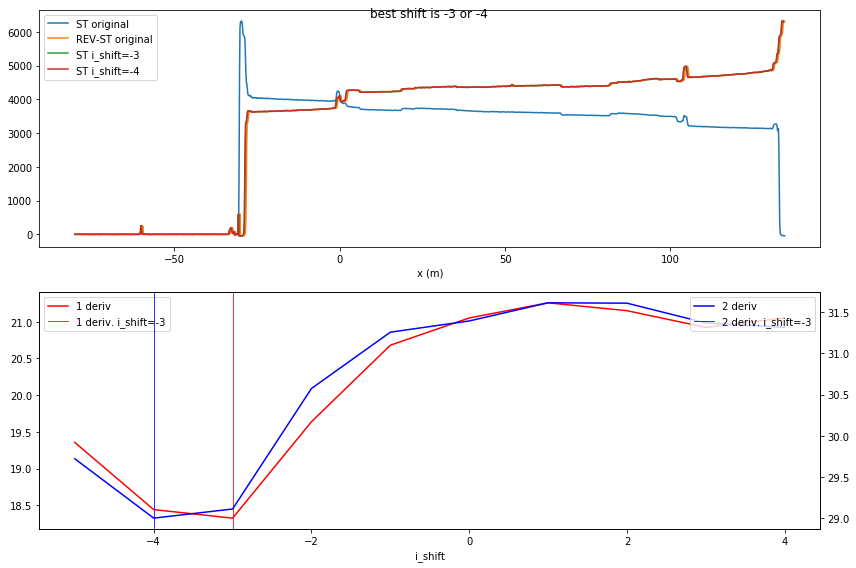

In [5]:
suggested_shift = suggest_cable_shift_double_ended(
    ds_notaligned, 
    np.arange(-5, 5), 
    plot_result=True, 
    figsize=(12,8))

The two approaches suggest a shift of -3 and -4. It is up to the user which suggestion to follow. Usually the two suggested shift are close

In [6]:
ds_restored = shift_double_ended(ds_notaligned, suggested_shift[0])

In [7]:
print(ds_aligned.x, 3*'\n', ds_restored.x)

<xarray.DataArray 'x' (x: 1693)>
array([-80.5043, -80.3772, -80.2501, ..., 134.294 , 134.421 , 134.548 ])
Coordinates:
  * x        (x) float64 -80.5 -80.38 -80.25 -80.12 ... 134.2 134.3 134.4 134.5
Attributes:
    name:              distance
    description:       Length along fiber
    long_description:  Starting at connector of forward channel
    units:             m 


 <xarray.DataArray 'x' (x: 1687)>
array([-80.123 , -79.9959, -79.8688, ..., 133.913 , 134.04  , 134.167 ])
Coordinates:
  * x        (x) float64 -80.12 -80.0 -79.87 -79.74 ... 133.8 133.9 134.0 134.2
Attributes:
    name:              distance
    description:       Length along fiber
    long_description:  Starting at connector of forward channel
    units:             m


Note that our fiber has become shorter by 2*3 spatial indices